In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/twitter-without-punc/train_twitter_no_punc.csv
/kaggle/input/twitter-without-punc/test_twitter_no_punc.csv


52625
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
5    20312
1    20312
2    20312
6    20312
3    20312
4    20312
7    20312
Name: category, dtype: int64
Shape of X_train:  (113747,)
Shape of X_test:  (28437,)
138873    i guess if you want to wear that ring you need...
1829      anyway my dream merch came today happy it s pr...
133081    i m officially a garland bitch i wanted cedar ...
137188    weird place  but also not  i feel a really ama...
53720     totally did not just wake after passing out on...
Name: description, dtype: object
4    16250
3    16250
7    16250
2    16250
1    16249
6    16249
5    16249
Name: category, dtype: int64
6    4063
1    4063
5    4063
2    4062
4    4062
3    4062
7    4062
Name: category, dtype: int64
              precision    recall  f1-score   support

           1       0.13      0.00      0.00      4063
           2       0.61      

Text(69.0, 0.5, 'Truth')

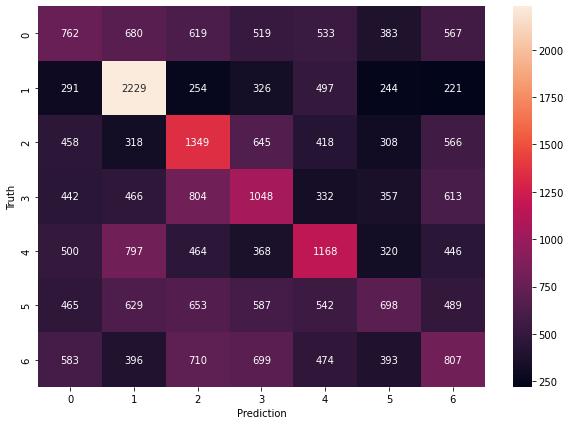

In [2]:
import pickle
df1 =pd.read_csv("../input/twitter-without-punc/train_twitter_no_punc.csv")
df2 =pd.read_csv("../input/twitter-without-punc/test_twitter_no_punc.csv") 
df2 = df2.rename(columns={'0': 'description','1':'category'})
df = df1.append(df2)
df = df.reset_index(drop=True)
corpus = df.description.to_list()
from sklearn.feature_extraction.text import TfidfVectorizer
v = TfidfVectorizer()
v.fit(corpus)
transform_output = v.transform(corpus)
print(len(v.vocabulary_))
print(transform_output.toarray())
print(df['category'].value_counts())
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    df.description, 
    df['category'], 
    test_size=0.2, # 20% samples will go to test dataset
    random_state=2022,
    stratify=df['category']
)
print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)
print(X_train.head())
print(y_train.value_counts())
print(y_test.value_counts())
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
#1. create a pipeline object
clf = Pipeline([
     ('vectorizer_tfidf',TfidfVectorizer()),    
     ('KNN', KNeighborsClassifier())         
])
#2. fit with X_train and y_train
clf.fit(X_train, y_train)
#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test)
#4. print the classfication report
print(classification_report(y_test, y_pred))
filename = 'KNN.sav'
pickle.dump(clf, open(filename, 'wb'))
print(X_test[:2])
print(y_test[:2])
print(y_pred[:2])
from sklearn.naive_bayes import MultinomialNB
#1. create a pipeline object
clf = Pipeline([
     ('vectorizer_tfidf',TfidfVectorizer()),    
     ('Multi NB', MultinomialNB())         
])
#2. fit with X_train and y_train
clf.fit(X_train, y_train)
#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test)
#4. print the classfication report
print(classification_report(y_test, y_pred))
filename = 'NaiveBayes.sav'
pickle.dump(clf, open(filename, 'wb'))
from sklearn.ensemble import RandomForestClassifier
#1. create a pipeline object
clf = Pipeline([
     ('vectorizer_tfidf',TfidfVectorizer()),     
     ('Random Forest', RandomForestClassifier())         
])
#2. fit with X_train and y_train
clf.fit(X_train, y_train)
#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test)
#4. print the classfication report
print(classification_report(y_test, y_pred))
filename = 'RandomForest.sav'
pickle.dump(clf, open(filename, 'wb'))
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
from matplotlib import pyplot as plt
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')